# Loan Data Exploration
This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Dataset comes from "Prosper" peer-to-peer lending platform.


### Question to ask.
What are the characteristics of a defaulter?

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
df_total = pd.read_csv("prosperLoanData.csv")

In [3]:
pd.set_option("display.max_columns", len(df_total.columns))
df_total.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

## Overview of Data 

In [4]:
df_total.shape

(113937, 81)

In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

#### We can see this Dataset is having 81 Columns. It is not possible to evaulate all the columns simultaneously. So we wiill firs take only the variables which might be helpful to our analysis. Also most of the variables are Numeric in Nature.

In [6]:
#Columns to be discarded 
discarded_vars = ["MemberKey","LP_CustomerPayments","LP_CustomerPrincipalPayments","LP_InterestandFees",
                  "LP_ServiceFees","LP_CollectionFees","LP_GrossPrincipalLoss","LP_NetPrincipalLoss",
                  "LP_NonPrincipalRecoverypayments","LoanOriginationQuarter","LoanOriginationDate",
                  "LoanNumber","LoanMonthsSinceOrigination","LoanFirstDefaultedCycleNumber",
                  "LoanCurrentDaysDelinquent","ScorexChangeAtTimeOfListing",
                 "LoanKey","ListingKey","ListingNumber","ListingCreationDate",
                 "CreditGrade","AmountDelinquent","BorrowerState","ClosedDate","CurrentDelinquencies",
                  "GroupKey","TotalTrades","TradesNeverDelinquent (percentage)","DateCreditPulled",
                 "DelinquenciesLast7Years","EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn",
                 "FirstRecordedCreditLine","OnTimeProsperPayments","OpenCreditLines","TradesOpenedLast6Months",
                 "TotalInquiries","LoanFirstDefaultedCycleNumber","ProsperRating (Alpha)",
                  "IncomeVerifiable","OpenRevolvingAccounts",'OpenRevolvingMonthlyPayment']

In [7]:
df_total.drop(discarded_vars,axis =1,inplace=True)

In [8]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 39 columns):
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperScore                           84853 non-null float64
ListingCategory (numeric)              113937 non-null int64
Occupation                             110349 non-null object
EmploymentStatus                       111682 non-null object
EmploymentStatusDuration               106312 non-null float64
IsBorrowerHomeowner                    113937 non-null bool
CurrentlyInGroup                       113937 non-null bool
CreditScoreRangeLower                  113346 non-null float64
CreditScoreRangeUpper 

### Checking Percentage of Missing Values

In [9]:
df_total.isnull().sum()/len(df_total)

Term                                   0.000000
LoanStatus                             0.000000
BorrowerAPR                            0.000219
BorrowerRate                           0.000000
LenderYield                            0.000000
ProsperRating (numeric)                0.255264
ProsperScore                           0.255264
ListingCategory (numeric)              0.000000
Occupation                             0.031491
EmploymentStatus                       0.019792
EmploymentStatusDuration               0.066923
IsBorrowerHomeowner                    0.000000
CurrentlyInGroup                       0.000000
CreditScoreRangeLower                  0.005187
CreditScoreRangeUpper                  0.005187
CurrentCreditLines                     0.066739
TotalCreditLinespast7years             0.006117
InquiriesLast6Months                   0.006117
PublicRecordsLast10Years               0.006117
PublicRecordsLast12Months              0.066739
RevolvingCreditBalance                 0

## Data Wrangling

" A charge-off usually occurs when the creditor has deemed an outstanding debt is uncollectible; this typically follows 180 days or six months of non-payment."

In [10]:
# Removing PercentFunded not 1 

df_total = df_total[df_total.PercentFunded==1]

In [11]:
# Removing the loans which are not completed or defaulted

df_total =  df_total[~(df_total.LoanStatus=="Current")]
df_total =  df_total[~(df_total.LoanStatus=="Cancelled")]
pattern = r'Past'
df_total = df_total[~df_total.LoanStatus.str.contains(pattern)]

df_total['LoanStatus'] = df_total['LoanStatus'].map({'Completed': 0, 'Defaulted': 1,'Chargedoff':1,'FinalPaymentInProgress':0})

In [12]:
#ListingCategory (numeric) renaming 

In [13]:
df_total["ListingCategory"] = df_total["ListingCategory (numeric)"]
df_total.drop("ListingCategory (numeric)",axis=1,inplace=True)
df_total["ProsperRating"] = df_total["ProsperRating (numeric)"]
df_total.drop("ProsperRating (numeric)",axis=1,inplace=True)

### Filling Missing Values

In [14]:
df_total.AvailableBankcardCredit.fillna(0,inplace= True)
df_total.BankcardUtilization.fillna(0,inplace= True)
df_total.BorrowerAPR.fillna(0,inplace= True)
df_total.CurrentCreditLines.fillna(0,inplace= True)
df_total.EmploymentStatus.fillna('Not available',inplace= True)
df_total.EmploymentStatusDuration.fillna(0,inplace= True)
df_total.InquiriesLast6Months.fillna(0,inplace= True)
df_total.Occupation.fillna("Other",inplace= True)
df_total.ProsperPaymentsLessThanOneMonthLate.fillna(0,inplace= True)
df_total.ProsperPaymentsOneMonthPlusLate.fillna(0,inplace= True)
df_total.TotalProsperLoans.fillna(0,inplace= True)
df_total.RevolvingCreditBalance.fillna(0,inplace= True)
df_total.ProsperPrincipalBorrowed.fillna(0,inplace= True)
df_total.ProsperPrincipalOutstanding.fillna(0,inplace= True)
df_total.PublicRecordsLast12Months.fillna(0,inplace= True)
df_total.PublicRecordsLast10Years.fillna(0,inplace= True)
df_total.TotalProsperPaymentsBilled.fillna(0,inplace= True)

In [15]:
df_total.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,TotalCreditLinespast7years,InquiriesLast6Months,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory,ProsperRating
0,36,0,0.16516,0.1580,0.1380,NaN,Other,Self-employed,2.0,True,True,640.0,659.0,5.0,12.0,3.0,0.0,0.0,0.0,0.00,1500.0,0.17,"$25,000-49,999",3083.333333,0.0,0.0,0.0,0.0,0.0,0.0,9425,330.43,1.0,0,0,0.0,258,0,NaN
2,36,0,0.28269,0.2750,0.2400,NaN,Other,Not available,0.0,False,True,480.0,499.0,0.0,3.0,0.0,0.0,0.0,0.0,0.00,0.0,0.06,Not displayed,2083.333333,0.0,0.0,0.0,0.0,0.0,0.0,3001,123.32,1.0,0,0,0.0,41,0,NaN
11,36,0,0.15033,0.1325,0.1225,NaN,Waiter/Waitress,Full-time,19.0,False,False,640.0,659.0,2.0,10.0,3.0,0.0,0.0,1220.0,0.32,2580.0,0.27,"$1-24,999",1666.666667,0.0,0.0,0.0,0.0,0.0,0.0,1000,33.81,1.0,0,0,0.0,53,0,NaN
15,36,1,0.35797,0.3177,0.3077,5.0,Other,Other,121.0,True,False,700.0,719.0,10.0,18.0,0.0,1.0,0.0,9103.0,0.97,178.0,0.49,"$50,000-74,999",5500.000000,0.0,0.0,0.0,0.0,0.0,0.0,4000,173.71,1.0,0,0,0.0,10,13,1.0
17,36,1,0.13202,0.1250,0.1175,NaN,Professional,Not available,0.0,True,True,760.0,779.0,0.0,36.0,7.0,0.0,0.0,0.0,0.00,0.0,0.12,Not displayed,5833.333333,0.0,0.0,0.0,0.0,0.0,0.0,10000,334.54,1.0,0,0,0.0,85,0,NaN


In [16]:
df_total.dropna(subset=['DebtToIncomeRatio', 'CreditScoreRangeLower','CreditScoreRangeUpper'],axis='rows',inplace=True)

### Breaking Into Old and New 

In [17]:
df_new = df_total[~df_total.ProsperScore.isna()]
df_old = df_total[df_total.ProsperScore.isna()]

In [18]:
df_new.isnull().sum()/len(df_new)

Term                                   0.0
LoanStatus                             0.0
BorrowerAPR                            0.0
BorrowerRate                           0.0
LenderYield                            0.0
ProsperScore                           0.0
Occupation                             0.0
EmploymentStatus                       0.0
EmploymentStatusDuration               0.0
IsBorrowerHomeowner                    0.0
CurrentlyInGroup                       0.0
CreditScoreRangeLower                  0.0
CreditScoreRangeUpper                  0.0
CurrentCreditLines                     0.0
TotalCreditLinespast7years             0.0
InquiriesLast6Months                   0.0
PublicRecordsLast10Years               0.0
PublicRecordsLast12Months              0.0
RevolvingCreditBalance                 0.0
BankcardUtilization                    0.0
AvailableBankcardCredit                0.0
DebtToIncomeRatio                      0.0
IncomeRange                            0.0
StatedMonth

## Data Engg

In [19]:
df_new["InquiriesLast6Months"] = pd.cut(np.array(df_new.InquiriesLast6Months), [-1,0,1,2,3,4,5,100],labels=["0","1","2","3","4","5","6+"])

/home/abhik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_new["InvestmentFromFriendsCount"] = pd.cut(np.array(df_new.InvestmentFromFriendsCount), [-1,2,4,1000],labels=["0","1-3","3+"])

/home/abhik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_new["Recommendations"] = pd.cut(np.array(df_new.Recommendations), [-1,0,100],labels=["0","1+"])

/home/abhik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_new["TotalProsperLoans"] = pd.cut(np.array(df_new.TotalProsperLoans), [-1,0,1,100],labels=["0","1","2+"])

/home/abhik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Data Viz 

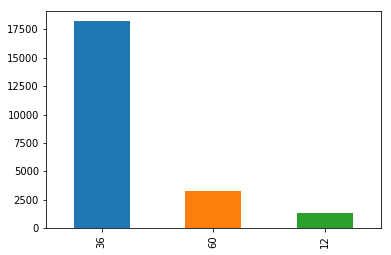

In [23]:
df_new.Term.value_counts().plot(kind='bar');

In [24]:
def value_counts_status(df,col):
    counts =  (df_new.groupby([col])['LoanStatus']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
    sns.barplot(x=col, y="percentage", hue="LoanStatus", data=counts);

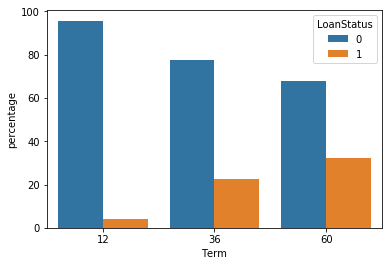

In [25]:
value_counts_status(df_new,'Term');

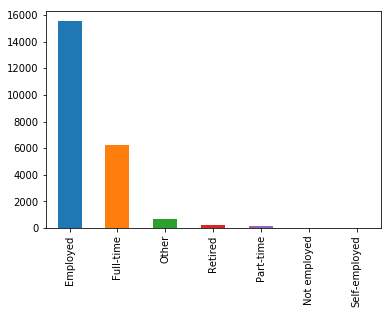

In [26]:
df_new.EmploymentStatus.value_counts().plot(kind='bar');

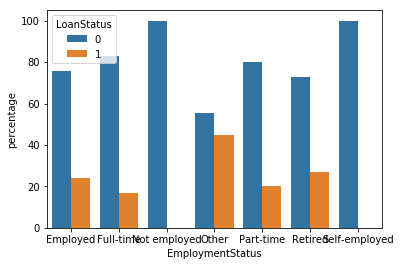

In [27]:
value_counts_status(df_new,'EmploymentStatus');

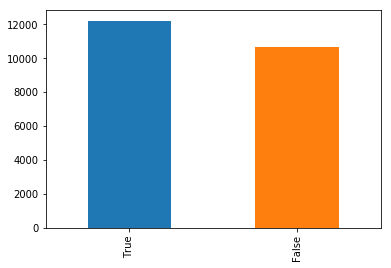

In [28]:
df_new.IsBorrowerHomeowner.value_counts().plot(kind='bar');

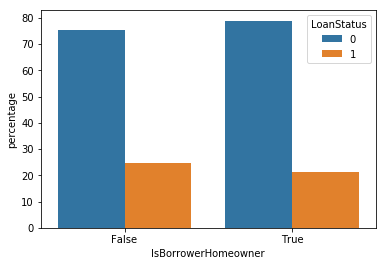

In [29]:
value_counts_status(df_new,'IsBorrowerHomeowner');

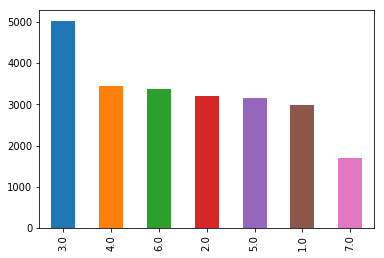

In [30]:
df_new.ProsperRating.value_counts().plot(kind='bar');

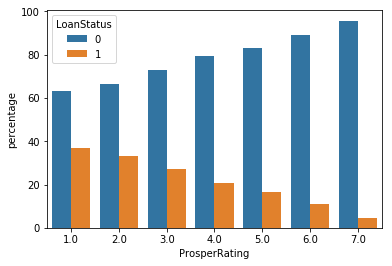

In [31]:
value_counts_status(df_new,'ProsperRating');

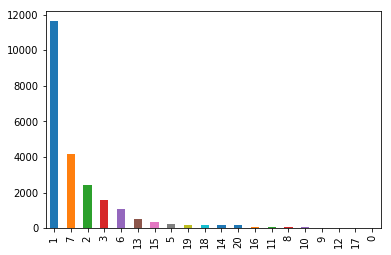

In [32]:
df_new.ListingCategory.value_counts().plot(kind='bar');

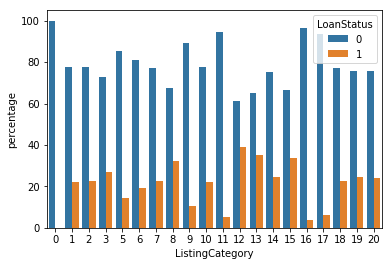

In [33]:
value_counts_status(df_new,'ListingCategory');

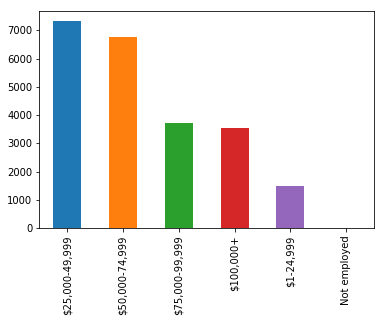

In [34]:
df_new.IncomeRange.value_counts().plot(kind='bar');

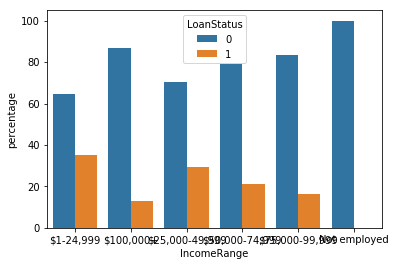

In [35]:
value_counts_status(df_new,'IncomeRange');

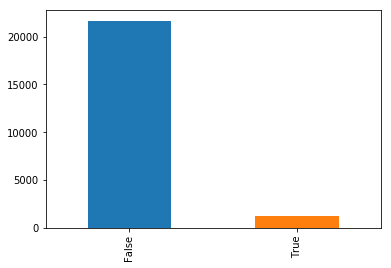

In [36]:
df_new.CurrentlyInGroup.value_counts().plot(kind='bar');

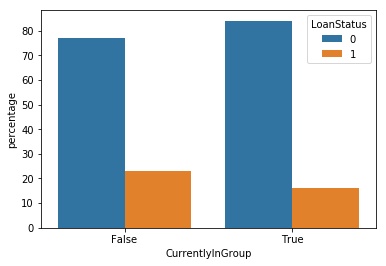

In [37]:
value_counts_status(df_new,'CurrentlyInGroup');

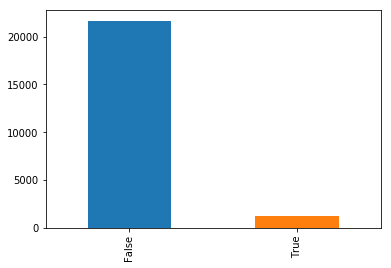

In [38]:
df_new.CurrentlyInGroup.value_counts().plot(kind='bar');

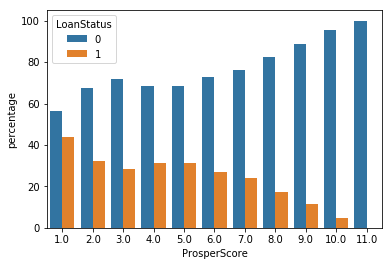

In [39]:
value_counts_status(df_new,'ProsperScore');

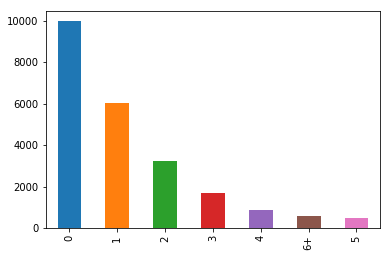

In [63]:
df_new.InquiriesLast6Months.value_counts().plot(kind='bar');

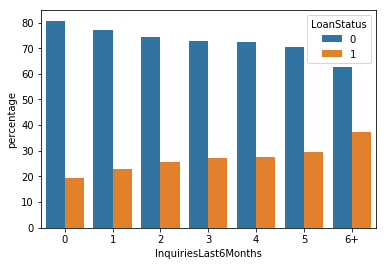

In [40]:
value_counts_status(df_new,'InquiriesLast6Months');

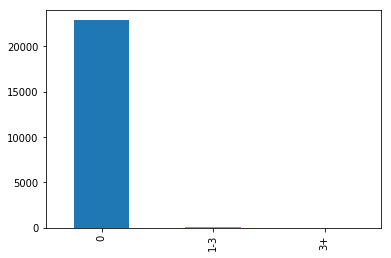

In [66]:
df_new.InvestmentFromFriendsCount.value_counts().plot(kind='bar');

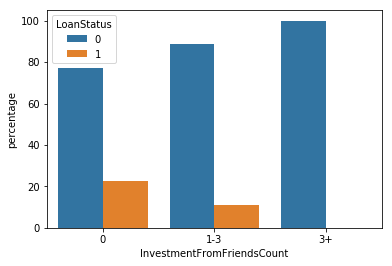

In [62]:
value_counts_status(df_new,'InvestmentFromFriendsCount');

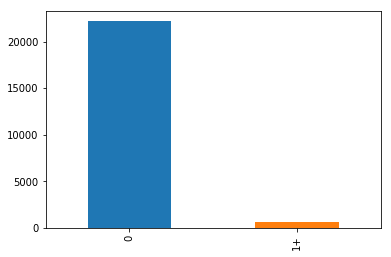

In [68]:
df_new.Recommendations.value_counts().plot(kind='bar');

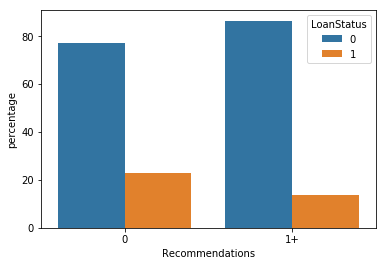

In [67]:
value_counts_status(df_new,'Recommendations');

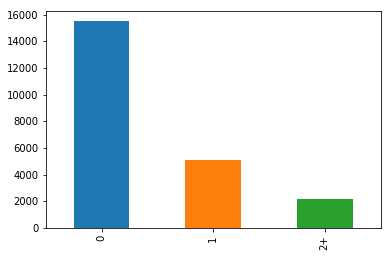

In [70]:
df_new.TotalProsperLoans.value_counts().plot(kind='bar');

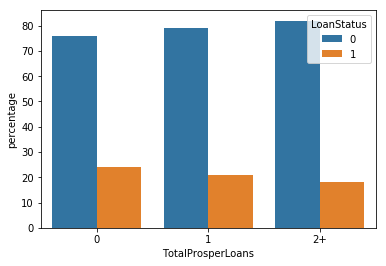

In [69]:
value_counts_status(df_new,'TotalProsperLoans');

In [41]:
## Continous 

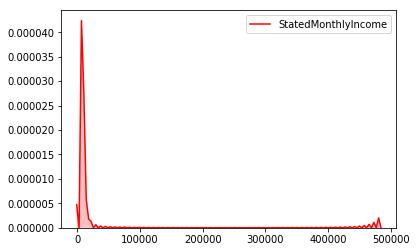

In [42]:
sns.kdeplot(df_new.StatedMonthlyIncome, shade=True, color="r");

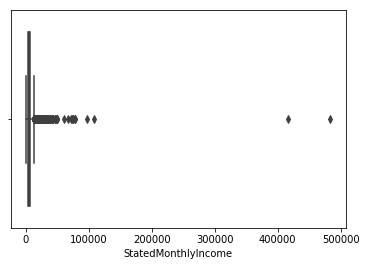

In [43]:
sns.boxplot(data=df_new,x='StatedMonthlyIncome')

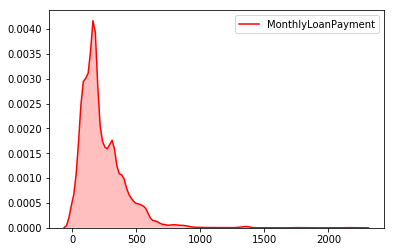

In [44]:
sns.kdeplot(df_new.MonthlyLoanPayment, shade=True, color="r");

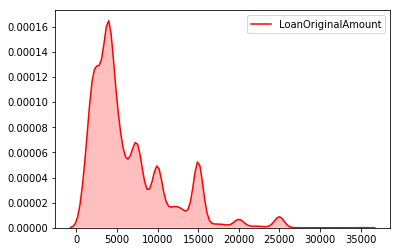

In [45]:
sns.kdeplot(df_new.LoanOriginalAmount, shade=True, color="r");

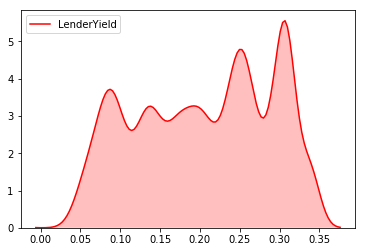

In [46]:
sns.kdeplot(df_new.LenderYield, shade=True, color="r");

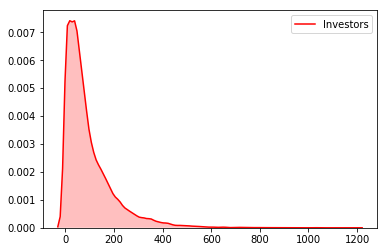

In [47]:
sns.kdeplot(df_new.Investors, shade=True, color="r");

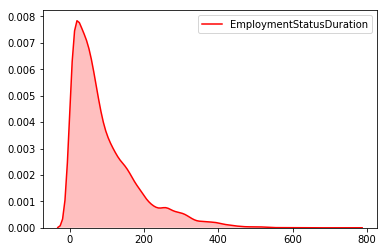

In [48]:
sns.kdeplot(df_new.EmploymentStatusDuration, shade=True, color="r");

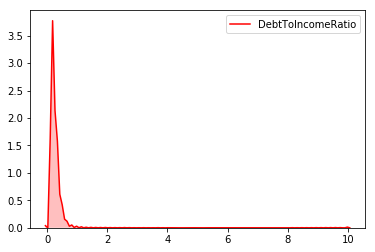

In [49]:
sns.kdeplot(df_new.DebtToIncomeRatio, shade=True, color="r");

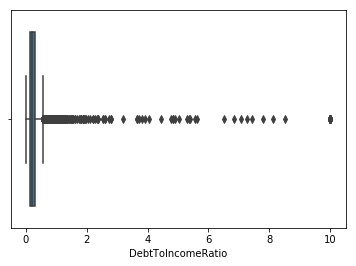

In [50]:
sns.boxplot(data=df_new,x='DebtToIncomeRatio')

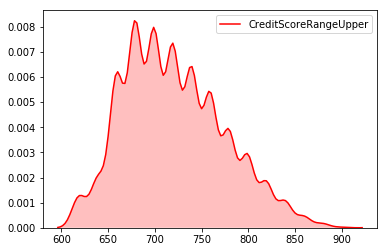

In [51]:
sns.kdeplot(df_new.CreditScoreRangeUpper, shade=True, color="r");

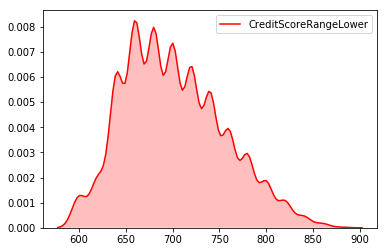

In [52]:
sns.kdeplot(df_new.CreditScoreRangeLower, shade=True, color="r");

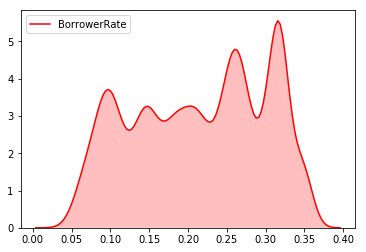

In [53]:
sns.kdeplot(df_new.BorrowerRate, shade=True, color="r");

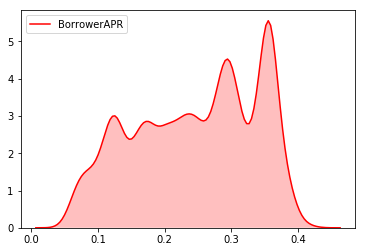

In [54]:
sns.kdeplot(df_new.BorrowerAPR, shade=True, color="r");

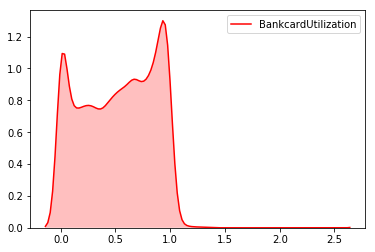

In [55]:
sns.kdeplot(df_new.BankcardUtilization, shade=True, color="r");

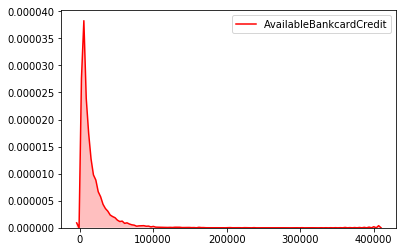

In [56]:
sns.kdeplot(df_new.AvailableBankcardCredit, shade=True, color="r");

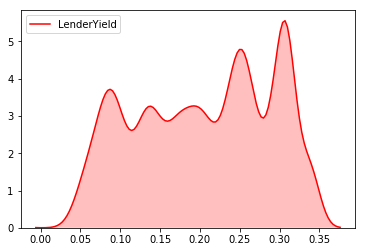

In [57]:
sns.kdeplot(df_new.LenderYield, shade=True, color="r");

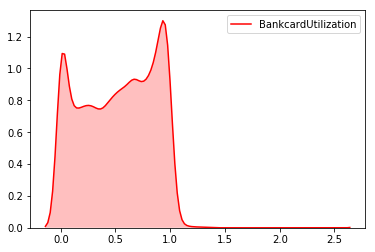

In [58]:
sns.kdeplot(df_new.BankcardUtilization, shade=True, color="r");

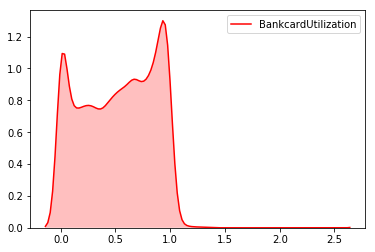

In [59]:
sns.kdeplot(df_new.BankcardUtilization, shade=True, color="r");

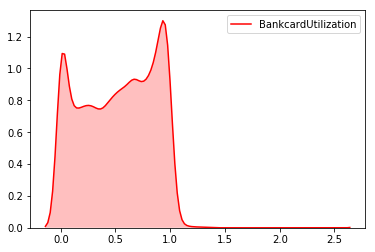

In [60]:
sns.kdeplot(df_new.BankcardUtilization, shade=True, color="r");

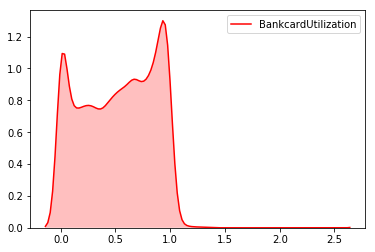

In [61]:
sns.kdeplot(df_new.BankcardUtilization, shade=True, color="r");

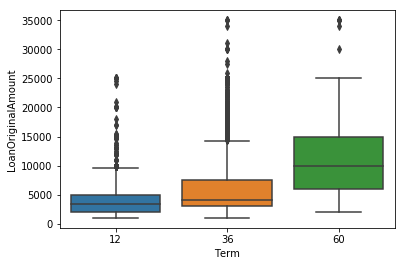

In [73]:
sns.boxplot(data=df_new,y='LoanOriginalAmount',x='Term');

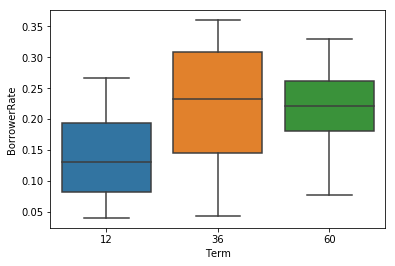

In [74]:
sns.boxplot(data=df_new,y='BorrowerRate',x='Term');

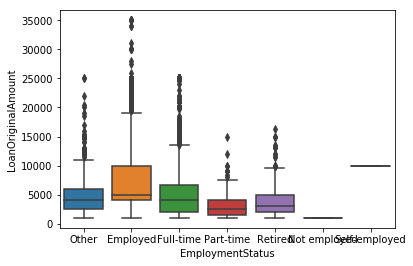

In [77]:
sns.boxplot(data=df_new,y='LoanOriginalAmount',x='EmploymentStatus');

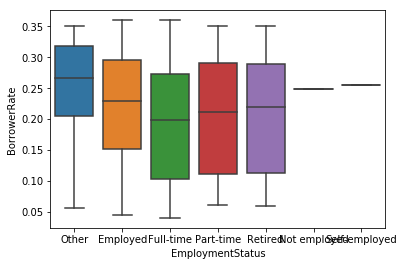

In [78]:
sns.boxplot(data=df_new,y='BorrowerRate',x='EmploymentStatus');

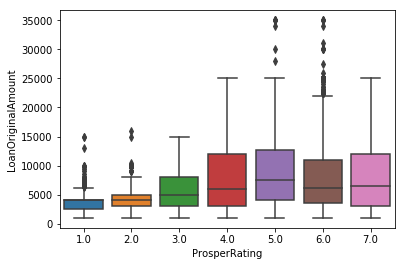

In [79]:
sns.boxplot(data=df_new,y='LoanOriginalAmount',x='ProsperRating');